# Windfarm Notebook

***

This notebook examines the suitability of a selection of locations in Ireland for power generation using wind as the source of energy. We will be analysing historical weather data to do this.

The weather data that we are analysing was downloaded from the [Met Éireann Historical Data website](https://www.met.ie/climate/available-data/historical-data). According to this source there are 25 synoptic weather stations recording a range of parameters including wind speed and direction.

**With reference to the datasets used in this project**

> •	Copyright Met Éireann

> •	Source www.met.ie

> •	This data is published under a Creative Commons Attribution 4.0 International (CC BY 4.0). https://creativecommons.org/licenses/by/4.0/

> •	Met Éireann does not accept any liability whatsoever for any error or omission in the data, their availability, or for any loss or  damage arising from their use.

>•	This material has been modified from the original 

According to the [SEAI](https://www.seai.ie/renewable-energy/wind-energy#:~:text=Wind%20energy%20in%20Ireland&text=It%20is%20both%20Ireland%27s%20largest,in%20Ireland%20after%20natural%20gas) wind energy is currently the largest contributing resource of renewable energy in Ireland. It is both Ireland's largest and cheapest renewable electricity resource. In 2020 Wind provided over 86% of Ireland's renewable electricity and 36% of our total electricity demand. It is the second greatest source of electricity generation in Ireland after natural gas. Ireland is one of the leading countries in its use of wind energy and 2nd place worldwide in 2020, after Denmark.

It is hoped that by 2030, 80% of Ireland's electricity will be produced from renewable sources, of which 9000 MW should come from onshore wind energy. See [Ireland’s Climate Action Plan](https://www.gov.ie/pdf/?file=https://assets.gov.ie/296414/7a06bae1-4c1c-4cdc-ac36-978e3119362e.pdf#page=null) for further details.


<div><img src="https://d3hnfqimznafg0.cloudfront.net/image-handler/ts/20180403085507/ri/850/src/images/Article_Images/ImageForArticle_703(1).jpg" alt="Domain Names", width=640, height=360"></div>



### Wind Energy in Ireland

The first commercial windfarm opened in Ireland in 1992 in Bellacorrick, Co. Mayo. Since then the number of windfarms has being stedily increasing and there are now over 300 wind-farms producing approximately 4780MW of energy each year. 

Ireland’s largest onshore wind farm is the [Oweninny Wind farm](https://www.oweninnywindfarm.ie/), which has a capacity of 192MW. This is enough to generate a volume of electricity equivalent to the average annual electrical demand of approximately 140,000 homes and businesses each year. Each turbine in the wind park has the capacity to generate 3MW of electricity a year.

The amount of energy a turbine generates depends on the type of turbine used and the available wind conditions at any time. For example, the `Siemens SWT-3.0-101 3MW` turbines are deployed in the [Galway Wind Park](https://www.sserenewables.com/onshore-wind/ireland/galway-wind-park/). Each of these turbines is capable of generating 3MW of energy per year, and 58 of them are deployed in the Galway wind park to give an overall capacity of approximately 174MW as year.

According to [Orsted](https://orsted.ie/renewable-energy-solutions/onshore-wind/onshore-wind-facts/is-onshore-wind-power-reliable) there is enough wind for energy production approximately 91% of the time in Ireland. There is too little wind approximately 8% of the time and too much wind approximately 1% of the time.


<div><img src="images/wind.png" alt="Wind Energy", width=640, height=360"></div>




 ### Description of Project

***

### **Tasks** 

1.  You may look for your own source of historic weather information, and/or
    use the Met Eireann one (Historical Data - Met Éireann - The Irish
    Meteorological Service). Click on the download button to get a zip file that
    contains a CSV file.
1.  You may need to clean and normalize the data before doing analysis

**Questions you can ask:**

1.  How much wind power is there at a particular location? This is quite open ended, is this just the mean wind speed for
    an hour/day/month/year, or should you take into account that there are wind ranges that the windfarms can operate in. (min
    max speeds)

1.  Some analysis of what power when would be useful (time of day/year)

1.  Are the wind speeds likely to be the same in 10 years in the future? ie is there a trend in recorded wind speeds over the last
    few decades.

1.  Is there any other weather metric worth analyzing (eg rain, temp)

1.  What will the power output of the windfarms in Ireland be like next week, according to the weather forecasts? (ok that is a
    tricky one,because you would need to get, or make up, information about the size and locations of the wind farms in Ireland, 
    or find/makeup the windspeed to power output equation.

1.  Anything else you can think of?



### Import the Libraries

***

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other 
features. 
Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large 
multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these 
arrays. 
[NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in 
conjunction with its numerical mathematics extension NumPy.


In [1]:
# Import required libraries
import os
import requests
import numpy as np        
from IPython.display import display
from python.download import Download as dl
from python.finddate import Finddate as fd
from python.stations import Stations as st
from python.metadata import Metadata as md
from python.createdb import CreateDB as cdb
from python.createtable import CreateTable as ctb
from python.testdb import TestDB as tdb
from python.writedb import WriteDB as wdb
from python.join import Join as jn
from python.clean_dataset import CleanDataset as clean
from python.best_fit import BestFit as bf
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox
import matplotlib.dates as mdates
import seaborn as sns      
import pandas as pd        

### Import the weather information for a number of weather stations.
***

Below, we will look at importing the weather data from a number of different locations around the country. We will created python classes to import the datasets into the `data folder` of this repository. We will also import the data to an SQL database called `weather`. We will create tables in the database with the location name of each station that we select for downloading the data from. For example `shannon_airport`, `dublin_airport` etc.

I have downloaded hourly data of each of the stations given in the `weather_stations` list below into the `data\hourly_data` folder of this repository. I had to come back and download daily data of each of the stations also into the `data\daily_data` folder. The reason for this will be explained in the `Load the dataset` section of this notebook, where I ran into some issues with the hourly data files. The `data\download` class has being used to download both the hourly and the daily data. 

The `python/writedb.py` class has being instanciated below also, and this class is used to write the hourly data to a `weather` database. This was completed just to look into databases, and learn a little more about `SQL` and databases. The tables contained in the weather database are just stored as tables, and no linking of the tables via `Primary Keys` and `Secondary Keys` has being included.

The images below show the database on the PhpMyAdmin , and the first rows of the 'shannon_airport` table contained in this database.

![PhpMyAdmin](images/mysql_database.png)

![shannon_airport](images/mysql_shannon.png)

In [2]:
#Daily weather base url
base_url = "https://cli.fusio.net/cli/climate_data/webdata/dly"
#Hourly weather base url
base_url_hourly = "https://cli.fusio.net/cli/climate_data/webdata/hly"


In [3]:
#Initialise a dictionary to store the stations data
stations_data = {}

#Create an instance of the station class which will store the metadata and dataframe for the stations
station = st()

#List of weather stations
weather_stations = [
     #{375: 'oak_part'},
     #{675: 'ballyhaise'},
     #{518: 'shannon_airport'},
     {775: 'sherkin_island'},
     #{1075: 'roches_point'},
     {3904: 'cork_airport'},
     {1575: 'malin_head'},
     #{2075: 'Finner'},
     #{3723: 'casement'},
     {532: 'dublin_airport'},
     {275: 'mace_head'},
     #{1875: 'athenry'},
     #{1175: 'newport'},
     #{4935: 'knock_airport'},
     #{2175: 'claremorris'},
     #{2375: 'belmullet'},
     #{1375: 'dunsany'},
     {1975: 'mt_dillon'},
     #{1475: 'gurteen'},
     #{875: 'mullingar'},
     #{1775:'johnstown_castle'},
     #{2275: 'valentia_observatory'},
]

#Loop through the weather stations and create an empty dictionary to store the data for each station
for i in range(len(weather_stations)):
     for key, value in weather_stations[i].items():
          item = station.get_station(key, value)
          stations_data.update(item)
     


In [4]:
# Define the directory to save the daily downloaded files
weather_dir = 'data/daily_data'
#And one to store the hourly downloaded files
weather_dir_hourly = 'data/hourly_data'                   

# Create the directory if it does not exist for the daily files
os.makedirs(weather_dir, exist_ok=True) 

# Loop through each station in the metadata dictionary and download weather station data
for station_id, metadata in stations_data.items():
    # Construct the URL for the station's ZIP file
    url = f'{base_url}{station_id}.zip'
    id = f'dly{station_id}.zip'

    #Create a new instance of the download class
    download = dl()
    
    download.downloadZip(url, weather_dir, id)

#Create the directory if it does not exist for the hourly files
os.makedirs(weather_dir_hourly, exist_ok=True)

#Loop through each station in the metadata dictionary and download weather station data
for station_id, metadata in stations_data.items():
    #Construct the URL for the station's ZIP file
    url = f'{base_url_hourly}{station_id}.zip'
    id = f'hly{station_id}.zip'

    #Create a new instance of the download class
    download = dl()

    download.downloadZip(url, weather_dir_hourly, id)

print("Download completed.")




Downloaded https://cli.fusio.net/cli/climate_data/webdata/dly775.zip to data/daily_data\dly775.zip
Downloaded https://cli.fusio.net/cli/climate_data/webdata/dly3904.zip to data/daily_data\dly3904.zip
Downloaded https://cli.fusio.net/cli/climate_data/webdata/dly1575.zip to data/daily_data\dly1575.zip
Downloaded https://cli.fusio.net/cli/climate_data/webdata/dly532.zip to data/daily_data\dly532.zip
Downloaded https://cli.fusio.net/cli/climate_data/webdata/dly275.zip to data/daily_data\dly275.zip
Downloaded https://cli.fusio.net/cli/climate_data/webdata/dly1975.zip to data/daily_data\dly1975.zip
Downloaded https://cli.fusio.net/cli/climate_data/webdata/hly775.zip to data/hourly_data\hly775.zip
Downloaded https://cli.fusio.net/cli/climate_data/webdata/hly3904.zip to data/hourly_data\hly3904.zip
Downloaded https://cli.fusio.net/cli/climate_data/webdata/hly1575.zip to data/hourly_data\hly1575.zip
Downloaded https://cli.fusio.net/cli/climate_data/webdata/hly532.zip to data/hourly_data\hly532.

In [5]:
# Loop through each station in the dictionary and update metadata
for station_id, station_info in stations_data.items():
    file_path = os.path.join(weather_dir, f"dly{station_id}.csv")  # Construct the path to the CSV file
    file_path_hourly = os.path.join(weather_dir_hourly, f"hly{station_id}.csv")  # Construct the path to the CSV file

    #Create a new instance of the finddate and metadata class
    finddate = fd()
    metadata = md()
    
    try:
        #Find the number of rows to skip in the CSV file. We will use this value when importing the data into a DataFrame
        #Use the instance of the finddate class to find the row number 
        skiprows = finddate.find_row(file_path)
        skiprows_hourly = finddate.find_row(file_path_hourly)

        #Extract the county name from the metadata
        county = station_info['metadata']['county']
        
        #Update the station metadata with the skiprows value
        station_info['metadata']['skiprows'] = skiprows  # Add skiprows to the station metadata
        station_info['metadata']['skiprows_hourly'] = skiprows_hourly  # Add skiprows to the station metadata
        
        #Extract latitude, longitude, and altitude from the CSV file header using the metadata class
        #Use the instance of the metadata class to extract the metadata
        station_name, latitude, longitude, altitude = metadata.extract_metadata(file_path)
        
        # Update the metadata with these values
        if station_name is not None:
            station_info['metadata']['station_name'] = station_name
        if latitude is not None:
            station_info['metadata']['latitude'] = latitude
        if longitude is not None:
            station_info['metadata']['longitude'] = longitude
        if altitude is not None:
            station_info['metadata']['altitude'] = altitude

        print(f"Metadata updated for {station_id} {county}")

        #Read the CSV file, skipping the appropriate number of header rows
        #df = pd.read_csv(file_path, skiprows=skiprows, low_memory=False)
        #Store the DataFrame in the 'data' section of the station's data
        #station_info['data'] = df
    
    except Exception as e:
        print(f"Failed to load metadata for {station_id} ({county}): {e}")


Metadata updated for 775 sherkin_island
Metadata updated for 3904 cork_airport
Metadata updated for 1575 malin_head
Metadata updated for 532 dublin_airport
Metadata updated for 275 mace_head
Metadata updated for 1975 mt_dillon


In [6]:
#We can get specific metadata such as the station name
stations_data[1575]['metadata']['station_name']

'MALIN HEAD'

In [7]:

db = cdb()

#Create an instance of the CreateTable class to create the tables in the database
tables = ctb()

# Create the tables in the database
for station_id, metadata in stations_data.items():
    name = metadata['metadata']['station_name'].lower()
    #Add an underscore if the name contains a space
    name = name.replace(" ", "_")
    #print(name)
    skiprows = int(metadata['metadata']['skiprows_hourly'])
    #print(skiprows)
    tables.create_table(name, skiprows)
                                                  

#Create an instance of the write class to write the data to a database 
#As above database has being created so commenting out to stop it being rerun again and again
#(Takes 4 minutes to load data to sql database)

write = wdb()

# Write the data to the database using the station name as the table name
for station_id, metadata in stations_data.items():
    name = metadata['metadata']['station_name'].lower()
    #Add an underscore if the name contains a space
    name = name.replace(" ", "_")
    id = station_id  
    skiprows = int(metadata['metadata']['skiprows_hourly'])
    write.write_db(name, id , skiprows)



Engine created
Engine created
Engine created
Engine created
Engine created
Engine created


In [8]:

#Test the database by querying the data
test = tdb()

#Test the database by querying the data. Print the first 20 rows of the table
test.test_db('cork_airport')

('01-jan-1962 01:00', 8, None, 0, -1.1, 0, -1.3, -1.6, 5.3, 94.0, 1016.0, 1, 14, 1, 340, 2, 0, None, 30000.0, 999.0, 2.0)
('01-jan-1962 02:00', 8, None, 0, -1.1, 0, -1.3, -1.6, 5.3, 94.0, 1016.5, 1, 10, 1, 340, 3, 1, None, 30000.0, 20.0, 7.0)
('01-jan-1962 03:00', 8, None, 0, -1.0, 0, -1.2, -1.6, 5.3, 94.0, 1016.7, 1, 12, 1, 320, 1, 1, None, 30000.0, 999.0, 3.0)
('01-jan-1962 04:00', 8, None, 0, -1.6, 0, -1.8, -2.2, 5.1, 94.0, 1017.2, 1, 8, 1, 330, 1, 0, None, 30000.0, 999.0, 1.0)
('01-jan-1962 05:00', 8, None, 0, -2.1, 0, -2.3, -3.3, 4.8, 93.0, 1018.0, 1, 11, 1, 320, 1, 0, None, 30000.0, 999.0, 0.0)
('01-jan-1962 06:00', 8, None, 0, -2.1, 0, -2.3, -3.3, 4.9, 93.0, 1018.1, 1, 11, 1, 330, 2, 1, None, 30000.0, 999.0, 0.0)
('01-jan-1962 07:00', 8, None, 0, -2.2, 0, -2.4, -3.3, 4.8, 93.0, 1018.8, 1, 11, 1, 340, 2, 0, None, 30000.0, 999.0, 0.0)
('01-jan-1962 08:00', 8, None, 0, -1.6, 0, -1.9, -2.7, 4.9, 92.0, 1019.0, 1, 14, 1, 340, 2, 0, None, 30000.0, 999.0, 0.0)
('01-jan-1962 09:00', 8, N

In [9]:
# create a weather data columns list which will be used to create the dataframes
weather_data_columns =[ 'Date/Time (utc)', 
                       'Maximum Air Temperature (C)',  
                       'Minimum  Air Temperature (C)', 
                       'Precipitation Amount (mm)', 
                       'Mean Wind Speed (knot)', 
                       'Highest ten minute mean wind speed (knot)', 
                       'Wind Direction at max 10 min. mean (deg)', 
                       'Highest Gust (knot)'
                       ]


### Load the datasets

***

Since it would be useful to analyse windspeed from the four corners of the country I have downloaded multiple datasets from the Met Éireann website into the `data` folder of this repository above. The datasets were not identical, in so far as they contain a different number of columns depending upon the location they were taken from. For example, in the case of the hourly data, some datasets contained 17 rows metadata, while others contained 23 rows metadata. Some datasets have 15 columns data, while other stations have 21 columns data. Therefore the first 17 rows of some of the datasets, and the first 23 rows of other datasets contained `metadata`, and it was important to skip these rows when importing the dataset from the `Met Éireann` website.  When importing the datasets the `skiprows` argument was passed to the `pd.read_csv()` function to skip the metadata contained in the first number of rows. I have used the metadata in these first rows to rename the columns of the dataset. This makes the datset clearer and easier to read. The `skipinitialspace=True` argument was used while importing the dataset, and the reasoning for this is explained below when we are looking at the missing values in the dataset.

I attempted to create a joined dataset which combined the hourly data for all the stations downloaded. Unfortunately, I ran into a few issues when doing this. There was no issues creating the dataset, but it ended up being approximately 175MB in size, and when I tried to commit this to the my GitHub repository, thats when the fun started. GitHub wont allow files greater than 100MB in size to be uploaded. Indeed, it doesn't like files greater than 50MB being uploaded, but will allow this if `Git Large File Storage (lfs)` is used. With `git lfs`, a reference to the large file is stored in the repository, but the file itself is stored elsewhere. You can set the `.gitattributes` file in your repository to track all the large file contained within it. For simplicity, I decided that all files containing the `.csv` format to be tracked by the `git lfs` system, so these files are not stored in this GitHub repository, but just a pointer to them.

![git lfs](images/github_largefile.png)

As it was not possible to create a joined dataset for the hourly data which was downloaded, and in fairness some of the hourly data files are rather large (shannon_airport_518.csv for example is over 50MB in size), I decided to change track. I am going to keep these files and analyse them indivually, but will also download the daily data for the same stations, and create a joined dataset for these to analyse all the stations in one dataset, side by side. Therefore, in the `data` folder of this repository, you will find an `hourly_data` folder, which contains the datasets to be analysed individually. You will also find a `daily_data` folder which contains daily data of the same weather stations and these are exclusively used to create the `joined_data` dataset, which we will also analyse. 

### Clean the datasets
***

#### Load and clean the daily `joined_data.csv` dataset


First step, we want to the combine all the daily datasets into one, and while we are doing this we will just create a dataset with the columns of interest to us. 

 Lets take the weather files contained in the `data/daily_data` folder and combine these into one `joined_data.csv` file which we can then create out pandas dataframe from. The `join` class in the python folder of this repository has being used to join these datasets together, and create a `joined_data.csv` file in the data folder of this repository.

In [10]:
#Lets try joining the dataset together

#Import the class to join our dataset
join = jn()

#Join the dataset together
join.join_data(weather_data_columns, stations_data)

Joined data saved to data/joined_data.csv


Now we can load this dataset into a pandas dataframe and clean the dataset. I have demonstrated the steps taken to clean the dataset in the next section of this notebook. We have already completed some cleaning tasks while importing the datasets into our repository. 
For example we have removed all cells that contain whitespace by using the `skipinitialspace` argument in the `read_csv()` function. In some datasets, the cells were found to contain whitespace, and these do not register as NA values. 

![skipspaces](images/skipinitialspace.png)

Therefore, using the `skipinitialspace=True` argument removed the whitespaces that had being masking the hidden values in our dataset. We then got a true picture of the number of missing values in each column of the dataset as shown in the code cell below.

While using the `skipinitialspace=True` argument proved to be simple and effective, its not the only way we could have tackled this problem. We could have went down the route of using python regular expressions in the `df.replace()` function. The regular expression given below would have also converted the whitespace characters in the dataset to NAN values.

```python
df.replace(r",\s", np.nan, regex=True, inplace=True)
```

Another method that could have being used is the find and replace in Visual Studio Code. Again, we would be using a regular expression to achieve this goal. A snapshot of the code we could have used in visual studion code to achieve this is shown below.

![cleaning](images/skipinitialspace.png)

Finally, it should be noted that the `read_csv()` function also contains an argument called `na_values` which allows the user to list strings to be recognised as NAN values. Therefore, for this dataset if we set the `na_values = ' '`, our whitespce characters would be recognised as NAN values when we load in the dataset. More information on this can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

![na_values](images/pandasna_values.png)


In [11]:
#Now lets load the dataset into a pandas dataframe
df = pd.read_csv('data/joined_data.csv')

#View the rows between 10 and 20
df.tail(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101295 entries, 0 to 101294
Data columns (total 9 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Date/Time (utc)                            101295 non-null  object 
 1   Maximum Air Temperature (C)                101273 non-null  float64
 2   Minimum  Air Temperature (C)               93949 non-null   float64
 3   Precipitation Amount (mm)                  101183 non-null  float64
 4   Mean Wind Speed (knot)                     101267 non-null  float64
 5   Highest ten minute mean wind speed (knot)  100326 non-null  float64
 6   Wind Direction at max 10 min. mean (deg)   100303 non-null  float64
 7   Highest Gust (knot)                        100327 non-null  float64
 8   Station Name                               101295 non-null  object 
dtypes: float64(7), object(2)
memory usage: 7.0+ MB


In [12]:
#Check for missing values

missing_values =df.isna().sum()

print(missing_values)


Date/Time (utc)                                 0
Maximum Air Temperature (C)                    22
Minimum  Air Temperature (C)                 7346
Precipitation Amount (mm)                     112
Mean Wind Speed (knot)                         28
Highest ten minute mean wind speed (knot)     969
Wind Direction at max 10 min. mean (deg)      992
Highest Gust (knot)                           968
Station Name                                    0
dtype: int64


In [13]:
#Drop the rows with missing values
df.dropna(inplace=True)

#Check for missing values again
missing_values =df.isna().sum()

print(missing_values)


Date/Time (utc)                              0
Maximum Air Temperature (C)                  0
Minimum  Air Temperature (C)                 0
Precipitation Amount (mm)                    0
Mean Wind Speed (knot)                       0
Highest ten minute mean wind speed (knot)    0
Wind Direction at max 10 min. mean (deg)     0
Highest Gust (knot)                          0
Station Name                                 0
dtype: int64


In [14]:
#As we will be analysing the data by month, we need to convert the 'Date/Time (utc)' column to a datetime 
df['Date/Time (utc)'] = pd.to_datetime(df['Date/Time (utc)'], format='%d-%b-%Y')

#Extract the month from the 'Date/Time (utc)' column
df['Month'] = df['Date/Time (utc)'].dt.month

#Extract the year from the 'Date/Time (utc)' column
df['Year'] = df['Date/Time (utc)'].dt.year

#Set the 'Date/Time (utc)' column as the index and get rid of the i
df.set_index('Date/Time (utc)', inplace=True) 


df.head()


,Maximum Air Temperature (C),Minimum Air Temperature (C),Precipitation Amount (mm),Mean Wind Speed (knot),Highest ten minute mean wind speed (knot),Wind Direction at max 10 min. mean (deg),Highest Gust (knot),Station Name,Month,Year
Date/Time (utc),,,,,,,,,,
1955-05-01,9.4,3.8,7.4,19.2,34.0,70.0,48.0,MALIN HEAD,5,1955
1955-05-02,11.2,5.9,0.0,14.2,24.0,310.0,31.0,MALIN HEAD,5,1955
1955-05-03,13.1,0.6,6.6,14.8,30.0,130.0,48.0,MALIN HEAD,5,1955
1955-05-04,12.8,6.1,4.4,19.9,27.0,230.0,41.0,MALIN HEAD,5,1955
1955-05-05,13.2,6.6,2.7,16.0,24.0,240.0,34.0,MALIN HEAD,5,1955


#### Clean the hourly datasets

***

Okay, so now that we have cleaned the `joined_data.csv` which contains the daily data, lets do the same task for the hourly datasets. We will remove the `indicator` columns, remove the NA values and set these up as a series of time-series datasets by converting the `Date/Time (utc)` column as a datetime object. We will move through the same process as above very quickly below by implementing our `python/clean_dataset.py` class which will clean each of the individual dataset for us. This has being completed below.


In [17]:
#Lets clean each of the hourly datasets using the clean_dataset class
hourly_datasets = {}

#Clean the dataset
for station_id, metadata in stations_data.items():
    name = metadata['metadata']['station_name'].lower()
    #Add an underscore if the name contains a space
    name = name.replace(" ", "_")
    #print(name)
    skiprows = int(metadata['metadata']['skiprows_hourly'])
    #print(skiprows)
    id = station_id
    
    #Create an instance of the clean class
    clean_data = clean(name=name, id=id, skiprows=skiprows)
    cleaned = clean_data.clean_dataset()
    hourly_datasets[name] = cleaned

malin_head = hourly_datasets['malin_head']
sherkin_island = hourly_datasets['sherkin_island']
mace_head = hourly_datasets['mace_head'] 
dublin_airport = hourly_datasets['dublin_airport'] 
cork_airport = hourly_datasets['cork_airport']
mt_dillon = hourly_datasets['mt_dillon']

malin_head.head()


,Date/Time (utc),Precipitation Amount (mm),Temperature (°C),Mean Wind Speed (knot)_malin,Predominant Wind Direction (deg),Month,Year
0,1955-05-01 01:00:00,0.0,8.5,11.0,130.0,5,1955
1,1955-05-01 02:00:00,0.0,8.2,11.0,120.0,5,1955
2,1955-05-01 03:00:00,0.0,7.3,8.0,120.0,5,1955
3,1955-05-01 04:00:00,0.0,7.8,18.0,130.0,5,1955
4,1955-05-01 05:00:00,0.0,8.1,9.0,110.0,5,1955


In [18]:
malin_head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479054 entries, 0 to 479053
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Date/Time (utc)                   479054 non-null  datetime64[ns]
 1   Precipitation Amount (mm)         479054 non-null  float64       
 2   Temperature (°C)                  479054 non-null  float64       
 3   Mean Wind Speed (knot)_malin      479054 non-null  float64       
 4   Predominant Wind Direction (deg)  479054 non-null  float64       
 5   Month                             479054 non-null  int32         
 6   Year                              479054 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 21.9 MB


### Analyse the data

***

So, now that we have cleaned our datasets, we can start to do some analysis on them.  Let us firstly examine what columns we are interested in looking at in the datasets. Obviously we need to analyse the wind speed column. Will temperature, wind-direction, precipitaion amount etc have any effect on the windspeed. Lets have a quick loot at the correlation between the variables in the dataset, is any relationship between any of these variables standing out. Lets take the daily `joined_data` dataset first and run a correlation analysis on this.

In [19]:

#Drop columns that are not needed for correlation analysis
correlation_df = df.drop(columns=['Station Name', 'Month', 'Year'])

#Correlate the data to see if there are any relationships between the variables
correlation = correlation_df.corr()


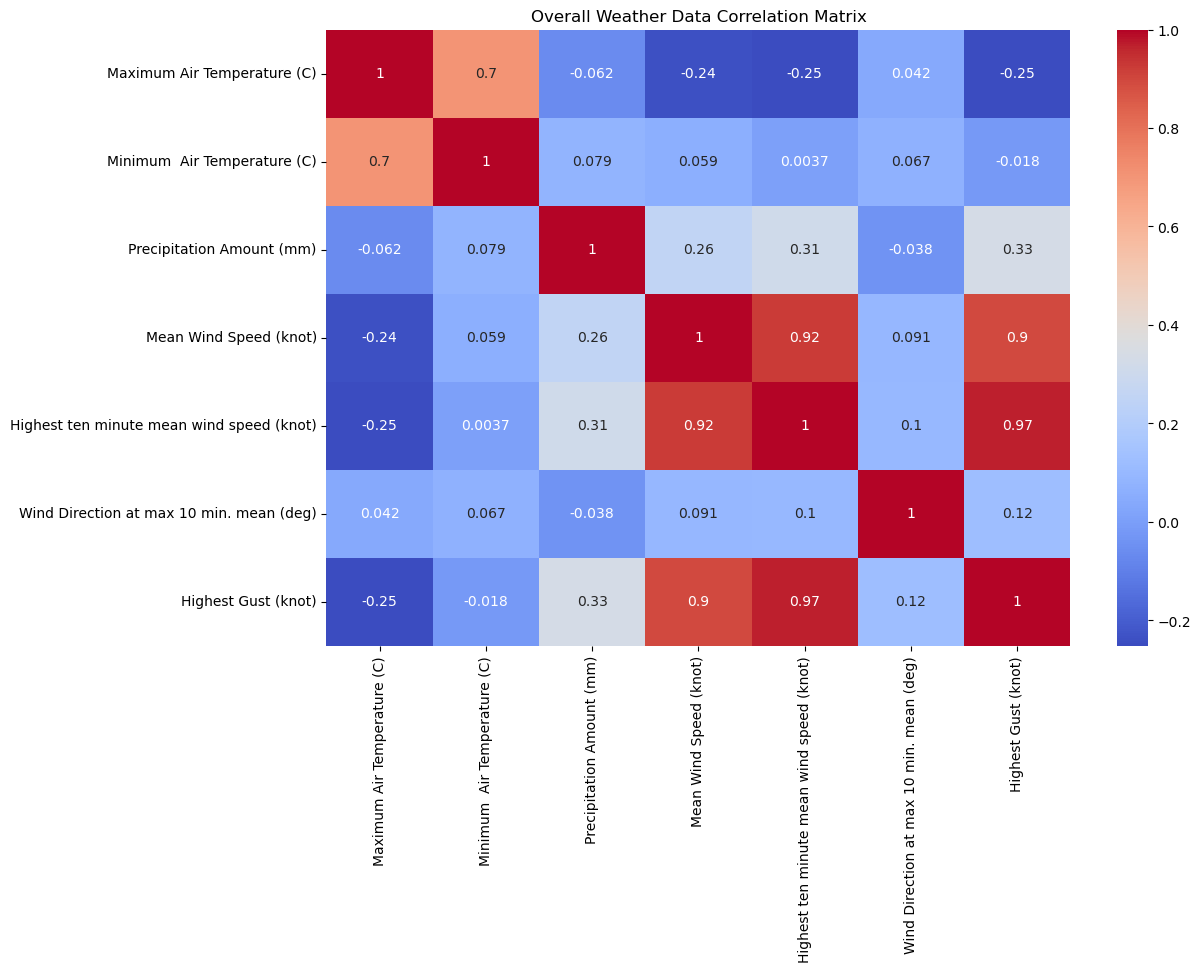

In [20]:
#Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Overall Weather Data Correlation Matrix')
plt.show()



Looking at the above it can be seen that there is very little correlation between temperature, precipitation and wind direction with the wind speed. There is as expected a strong correlation between highest ten minute mean wind speed, and the highest gust columns with the wind speed column. It could be argued that these columns don't really add any futher useful information to our analysis. We are therefore from this point forward only going to deal witht the mean windspeed column when analysing the data to select a suible location for our windfarm.

Obviously, next we need to select a time frame which over which we will analyse our data in the dataset. To do this we should look and see what years the data is being recorded for each station. We can use the `groupby()` function to find the max and min years for each station and this will give us an indication of what timeframe would be best for our analysis. We will do this below.

In [21]:
#Group the stations by year to see the range of years for each station
station_years = df.groupby('Station Name')['Year'].agg(['min', 'max'])

#sort by the minimum year
station_years = station_years.sort_values(by='min', ascending=True)

print(station_years)



                 min   max
Station Name              
DUBLIN AIRPORT  1944  2024
MALIN HEAD      1955  2024
CORK AIRPORT    1962  2024
MACE HEAD       2010  2024
SHERKIN ISLAND  2010  2024
MT DILLON       2011  2024


In [22]:
#So athenry has data from 2012 onwards, so lets look at the data from 2012 onwards for all stations

df = df[df['Year'] >= 2012]

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28263 entries, 2012-01-01 to 2024-11-30
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Maximum Air Temperature (C)                28263 non-null  float64
 1   Minimum  Air Temperature (C)               28263 non-null  float64
 2   Precipitation Amount (mm)                  28263 non-null  float64
 3   Mean Wind Speed (knot)                     28263 non-null  float64
 4   Highest ten minute mean wind speed (knot)  28263 non-null  float64
 5   Wind Direction at max 10 min. mean (deg)   28263 non-null  float64
 6   Highest Gust (knot)                        28263 non-null  float64
 7   Station Name                               28263 non-null  object 
 8   Month                                      28263 non-null  int32  
 9   Year                                       28263 non-null  int32  
dtypes: fl

### Wind turbine design

***

Wind turbine design is the process of defining the form and configuration of a wind turbine to extract energy from the wind. An 
installation consists of the systems needed to capture the wind's energy, point the turbine into the wind, convert mechanical 
rotation into electrical power, and other systems to start, stop, and control the turbine.

**Betz Law**
In 1919, German physicist [Albert Betz](https://en.wikipedia.org/wiki/Albert_Betz) showed that for a hypothetical ideal wind-energy 
extraction machine, the fundamental laws of conservation of mass and energy allowed no more than 16/27 (59.3%) of the wind's kinetic 
energy to be captured. This Betz' law limit can be approached by modern turbine designs which reach 70 to 80% of this theoretical 
limit.

The speed at which the turbine first starts to rotate and generate power is called the [`cut in speed`](https://theroundup.org/wind-turbine-power-curve/) and is typically between `3 and 4 meters per second`


However, typically somewhere between `12 and 17 meters per second`, the power output reaches the limit that the electrical generator 
is capable of. This limit to the generator output is called the `rated power output` and the wind speed at which it is reached is 
called the `rated output wind speed`.

As the speed increases above the `rated output wind speed`, the forces on the turbine structure continue to rise and, at some point, 
there is a risk of damage to the rotor. As a result, a braking system is employed to bring the rotor to a standstill. This is called 
the `cut-out speed` and is usually around `25 meters per second`.

This is summarised in the table below
  
<center>  

| Wind Speed m/s | Wind Speed mph | What Happens |  
|----------------|-----------------|--------------|  
| ≥ 3-4  | ≥ 7-9  | Cut-in Speed, Wind turbines start operating  |  
| 12–17  | 25-38  | Wind turbines reach rated power output  |   
| ≥ 25   | ≥ 55    | Wind turbines shut down to prevent damage  |

</center>  

**Wind turbine efficiency or power coefficient**

The available power in a stream of wind of the same cross-sectional area as the wind turbine can easily be shown to be:

![Available Power](https://theroundup.org/wp-content/uploads/2022/08/wind-turbine-power-coefficient.png)

Where

- U - wind speed is in m/s
- ρ - density in kilograms per cubic meter
- d - diameter in meters

and available power is in watts.

The efficiency, μ, or, as it is more commonly called, the power coefficient, cp, of the wind turbine is simply defined as the actual 
power delivered divided by the available power.

![efficiency](https://theroundup.org/wp-content/uploads/2022/08/wind-turbine-power-coefficient-2.png)

Table 1. Speed requirement for some popular wind turbine models. Found at this [source](file:///C:/Users/micha/Downloads/On_the_need_for_the_development_of_low_wind_speed_.pdf)


| S/N | Turbine Model | Cut-in speed (m/s) | Cut-out speed (m/s) | Rated speed (m/s) | Power Rating (kW) | Hub Height |
|-----|---------------|--------------------|---------------------|-------------------|-------------------|------------|
| 1   | PGE 20/25     | 3.5                | 25                  | 9.0               | 25                | 24/30/36   |
| 2   | Enercon       | 3.0                | 25                  | 12                | 3000              | 120/135    |
| 3   | G.E 1.5 xle   | 3.5                | 20                  | 11.5              | 1500              | 80         |
| 4   | GE 1.5 sle    | 3.5                | 25                  | 14                | 1500              | 65/80      |
| 5   | AV 927        | 3.0                | 25                  | 13.1              | 3300              | 60-80      |
| 6   | AV 928        | 3.0                | 25                  | 11.6              | 2500              | 80         |
| 7   | V 90          | 4.0                | 25                  | 15                | 3000              | 80         |
| 8   | SWT-3.6-107   | 3.0                | 25                  | 13                | 3600              | 80         |



### Wind Distribution at our selected locations

Firstly, as we have seen above turbines start operating at windspeeds of approximately 3-4m/s. We also know that they stop operating above speeds of 25m/s. As the wind turbines reach rates output speed between 12-17m/s, we can classify any windspeed above 12m/s as being in the optimal range for wind turbines. Lets now analyse each of our chosen locations and see what percentage of the time the average wind speed is within these operating conditions. This will give us an indication of which location would be more suitable for the location of the wind-farm.



In [23]:
df['Mean Wind Speed (m/s)'] = round(df['Mean Wind Speed (knot)'] * 0.514444, 2)

#Get just the windspeed data for each location and reset the index
windspeed = df[['Station Name', 'Mean Wind Speed (m/s)', 'Month', 'Year']].copy().reset_index(drop=True)

#Print the first 5 rows
windspeed.head()


,Station Name,Mean Wind Speed (m/s),Month,Year
0,MALIN HEAD,12.30,1,2012
1,MALIN HEAD,12.04,1,2012
2,MALIN HEAD,16.82,1,2012
3,MALIN HEAD,16.51,1,2012
4,MALIN HEAD,15.54,1,2012


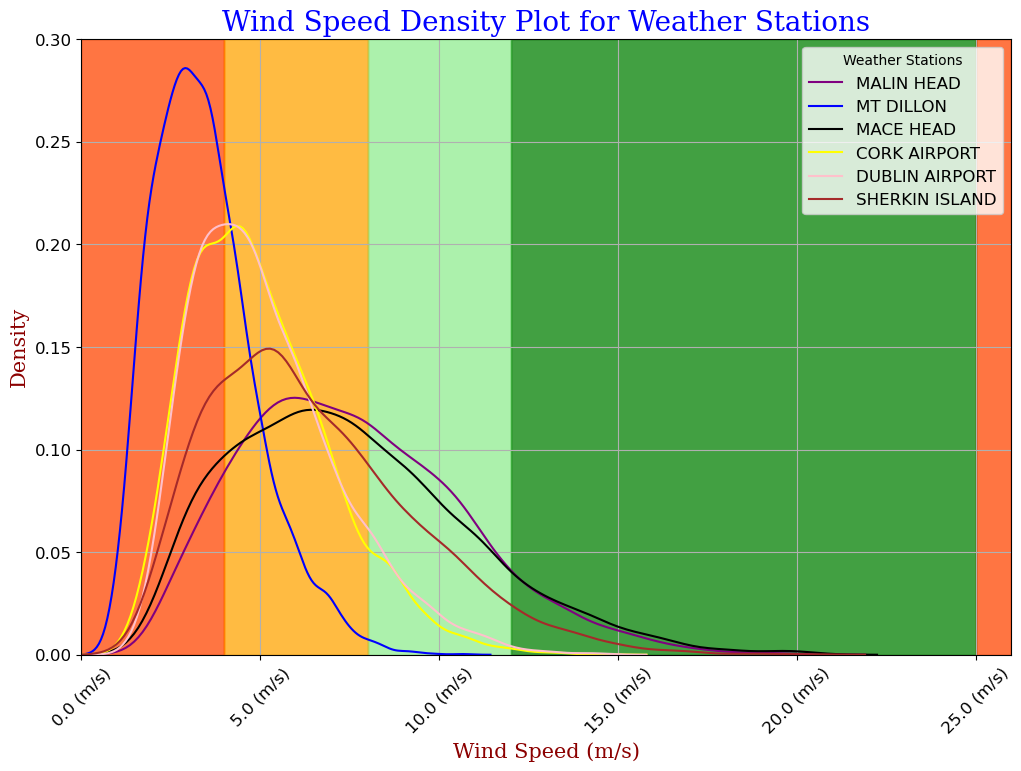

In [24]:

# Create a function to format the windspeed values on the y-axis
def windspeed_formatter(windspeed, pos):
    s = f"{windspeed} (m/s)"
    return s

#Plot the wind speed as a denity plot for each station
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Set the colours for the density plot
colours = ['orangered', 'orange', 'lightgreen', 'green']
plot_colours = ['purple', 'blue', 'black', 'yellow', 'pink', 'brown']

turbine_rating = ['bad', 'poor', 'good', 'excellent']

i = 0
for station in windspeed['Station Name'].unique():
    ax = sns.kdeplot(windspeed[windspeed['Station Name'] == station]['Mean Wind Speed (m/s)'], ax=ax, color=plot_colours[i], label=station)
    ax.axvspan(0, 4, alpha=0.2, color=colours[0])
    ax.axvspan(4, 8, alpha=0.2, color=colours[1])
    ax.axvspan(8, 12, alpha=0.2, color=colours[2])
    ax.axvspan(12, 25, alpha=0.2, color=colours[3])
    ax.axvspan(25, 26 , alpha=0.2, color=colours[0])
    
    i += 1
    
#Add a legend
ax.legend(loc='upper right', fontsize=12, title='Weather Stations')

#Set the title and labels for the plot
ax.set_title('Wind Speed Density Plot for Weather Stations', fontdict=font1)
ax.set_xlabel('Wind Speed (m/s)', fontdict=font2)
ax.set_ylabel('Density', fontdict=font2)

#Set the y-axis to display the windspeed in km/h
ax.xaxis.set_major_formatter(windspeed_formatter)

ax.grid(True)
ax.set_xlim(0, 26)

#Add ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()

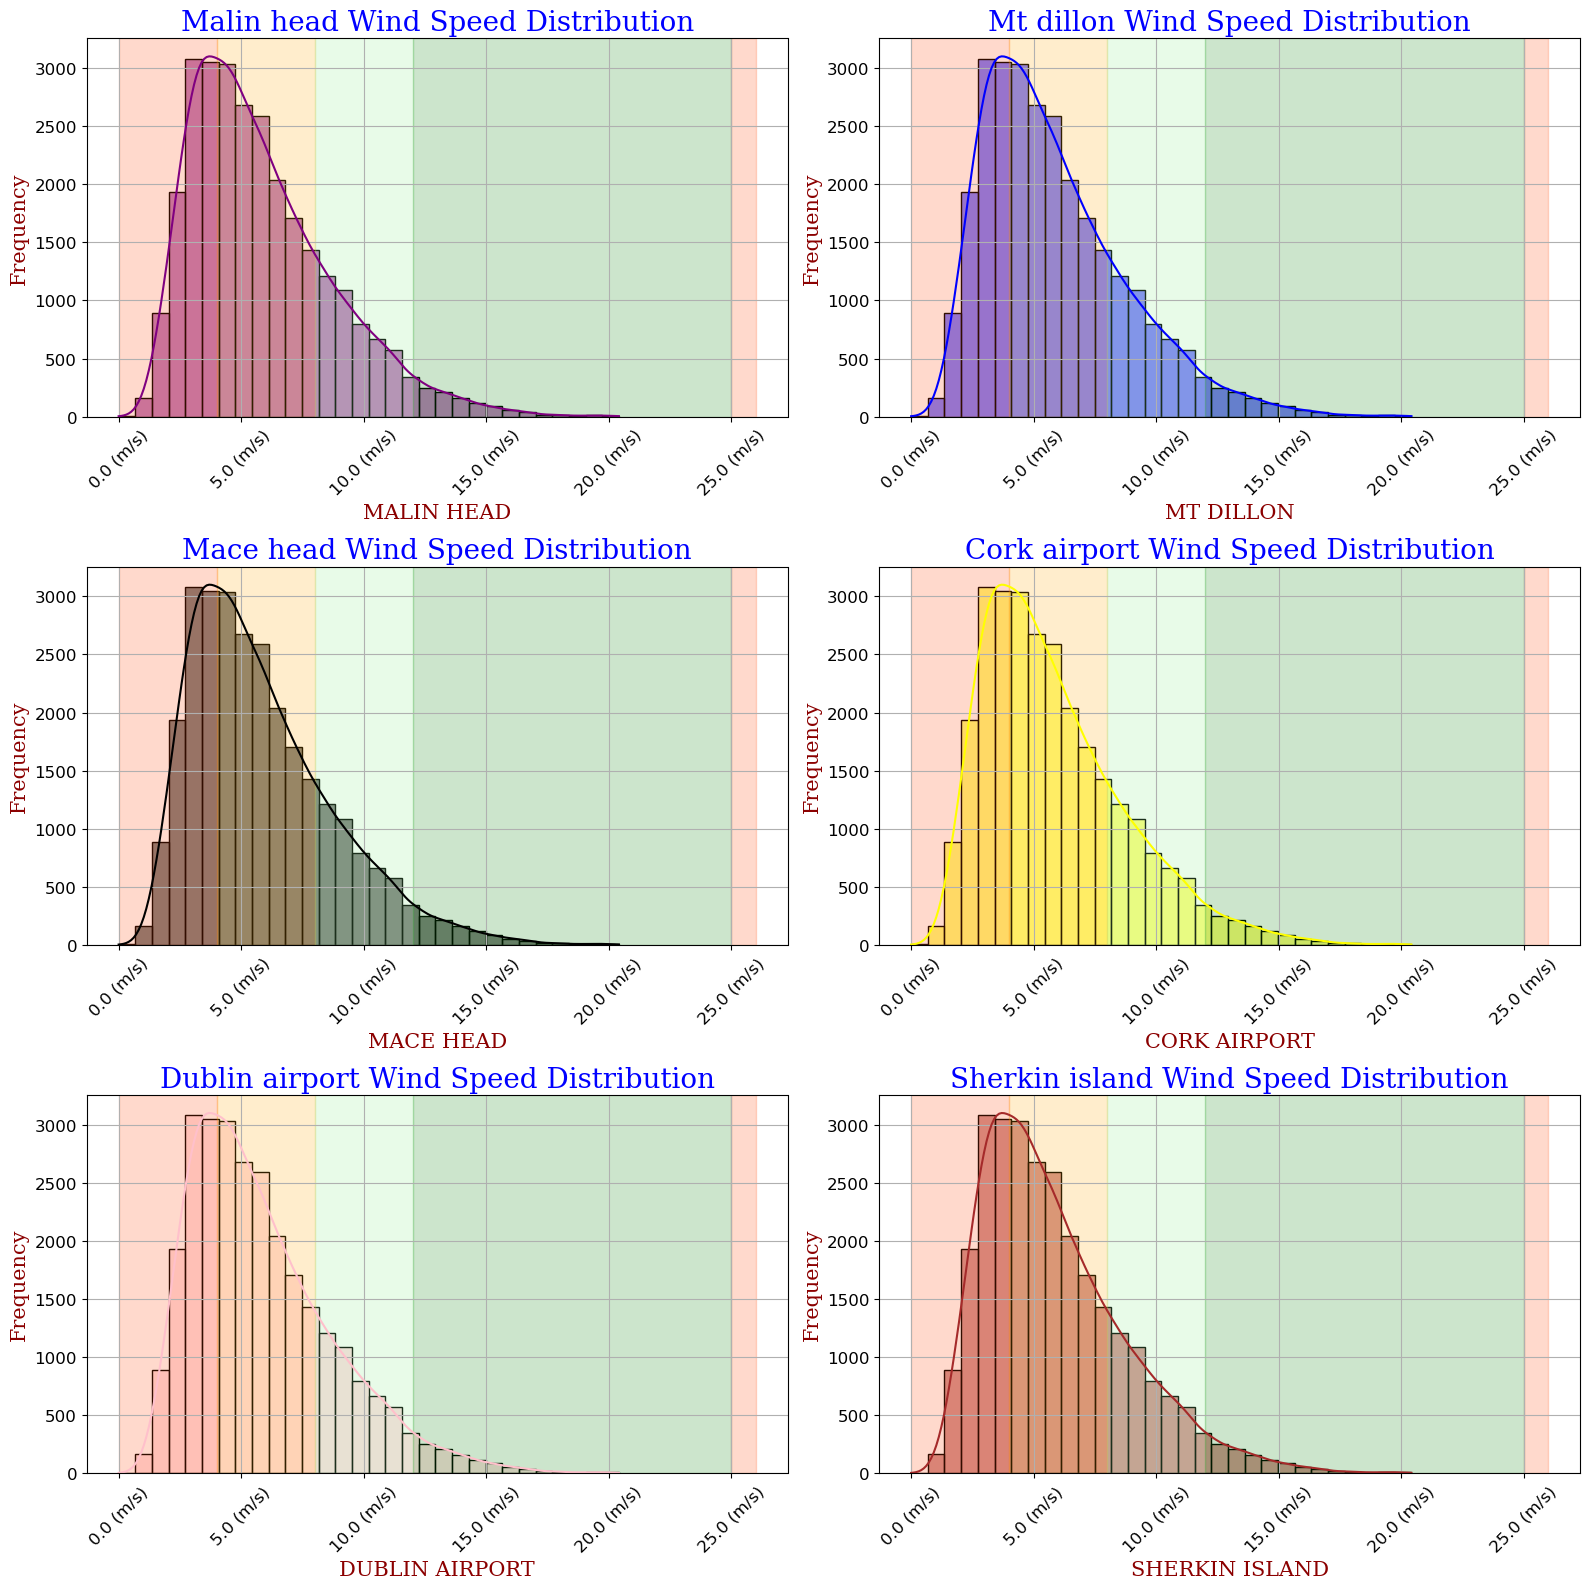

In [26]:
#Plot the wind speed as a denity plot for each station
plt.figure(figsize=(16, 16))

#Set the colours for the density plot
colours = ['orangered', 'orange', 'lightgreen', 'green']
plot_colours = ['purple', 'blue', 'black', 'yellow', 'pink', 'brown']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


i = 1
for station in windspeed['Station Name'].unique():
    plt.subplot(3, 2, i)
    sns.histplot(windspeed['Mean Wind Speed (m/s)'],  bins=30, kde=True, color=plot_colours[i-1])
    plt.axvspan(0, 4, alpha=0.2, color=colours[0])
    plt.axvspan(4, 8, alpha=0.2, color=colours[1])
    plt.axvspan(8, 12, alpha=0.2, color=colours[2])
    plt.axvspan(12, 25, alpha=0.2, color=colours[3])
    plt.axvspan(25, 26 , alpha=0.2, color=colours[0])
    name = station.capitalize()

    #Set the title and labels for the plot
    plt.title(f'{name} Wind Speed Distribution', fontdict=font1)
    plt.xlabel(station, fontdict=font2)
    plt.ylabel('Frequency', fontdict=font2)

    #Set the y-axis to display the windspeed in km/h
    plt.gca().xaxis.set_major_formatter(windspeed_formatter)

    #Add a grid
    plt.grid(True)

    #Add ticks
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)

    plt.x_lim = (0, 26)

    i += 1

plt.tight_layout()
plt.show()

In [27]:
#Create a new column to store the rating of the wind speed
windspeed['Rating'] = ''

count = 0

#Assign a rating to the wind speed in the dataset. The ratings are based on the wind turbine rating system
#We will use the following ratings: bad, poor, good, optimal
#The df.interuples() function is used to iterate over the rows in the dataframe
#We only need to iterate over the wind speed column to assign the rating
#The rating is assigned based on the wind speed value
#The rating is then stored in the 'rating' column in the dataframe
for row in windspeed.itertuples():
    if row[2] < 4:
        windspeed.at[count, 'Rating'] = 'zero'
    elif row[2] >= 4 and row[2] < 8:
        windspeed.at[count, 'Rating'] = 'poor'
    elif row[2] >= 8 and row[2] < 12:
        windspeed.at[count, 'Rating'] = 'good'
    elif row[2] >= 12 and row[2] < 25:
        windspeed.at[count, 'Rating'] = 'optimal'
    else:
        windspeed.at[count, 'Rating'] = 'zero'
    count += 1

windspeed.head()

,Station Name,Mean Wind Speed (m/s),Month,Year,Rating
0,MALIN HEAD,12.30,1,2012,optimal
1,MALIN HEAD,12.04,1,2012,optimal
2,MALIN HEAD,16.82,1,2012,optimal
3,MALIN HEAD,16.51,1,2012,optimal
4,MALIN HEAD,15.54,1,2012,optimal


In [29]:
#Sum up each of the ratings for each station
rating_counts = windspeed.groupby(['Station Name', 'Rating'])['Rating'].count()


rating_counts

Station Name    Rating 
CORK AIRPORT    good        381
                optimal      12
                poor       2704
                zero       1620
DUBLIN AIRPORT  good        453
                optimal      19
                poor       2689
                zero       1557
MACE HEAD       good       1411
                optimal     466
                poor       2163
                zero        669
MALIN HEAD      good       1547
                optimal     417
                poor       2213
                zero        534
MT DILLON       good         27
                poor       1430
                zero       3238
SHERKIN ISLAND  good       1048
                optimal     212
                poor       2444
                zero       1009
Name: Rating, dtype: int64

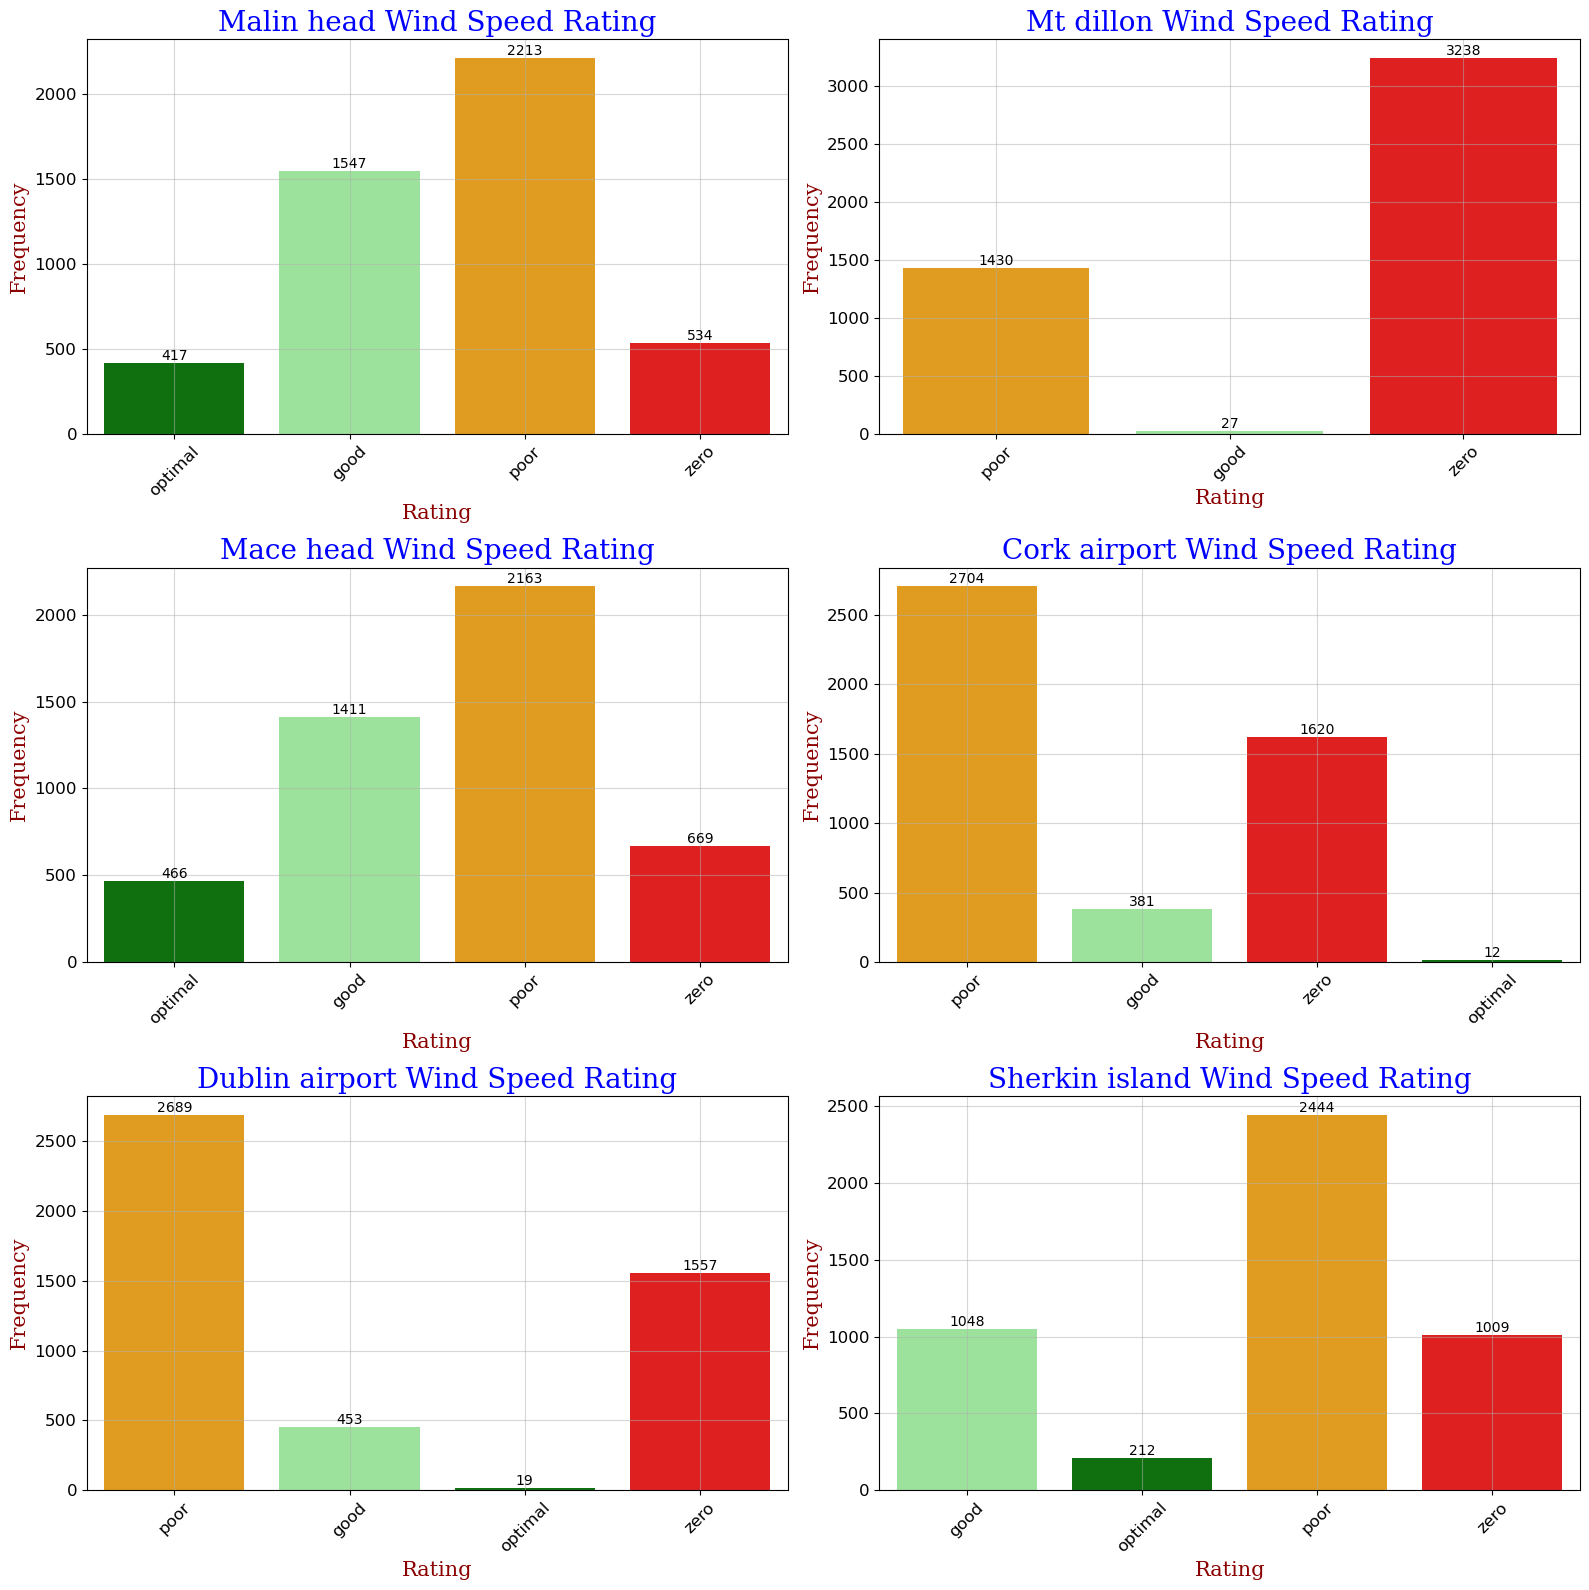

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Set the colours for the pie chart
colours = ['red', 'orange', 'lightgreen', 'green', 'red']
rating = ['zero','poor','good','optimal', 'zero']
colormap = {rating[0]:colours[0], rating[1]:colours[1], rating[2]:colours[2], rating[3]:colours[3], rating[4]:colours[4]}

i = 1

for station in windspeed['Station Name'].unique():
    size = len(rating_counts[station])
    plt.subplot(3, 2, i)
    sns.countplot(x='Rating', data=windspeed[windspeed['Station Name'] == station], hue='Rating', palette=colormap)
    for j in range(size):
        plt.gca().bar_label(plt.gca().containers[j])

    

    #Set the title and labels for the plot
    plt.title(f'{station.capitalize()} Wind Speed Rating', fontdict=font1)
    plt.xlabel('Rating', fontdict=font2)
    plt.ylabel('Frequency', fontdict=font2)
    

    #Add a grid
    plt.grid(True, alpha=0.5, which='both')

    #Add ticks
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    i += 1



plt.tight_layout()

plt.show()

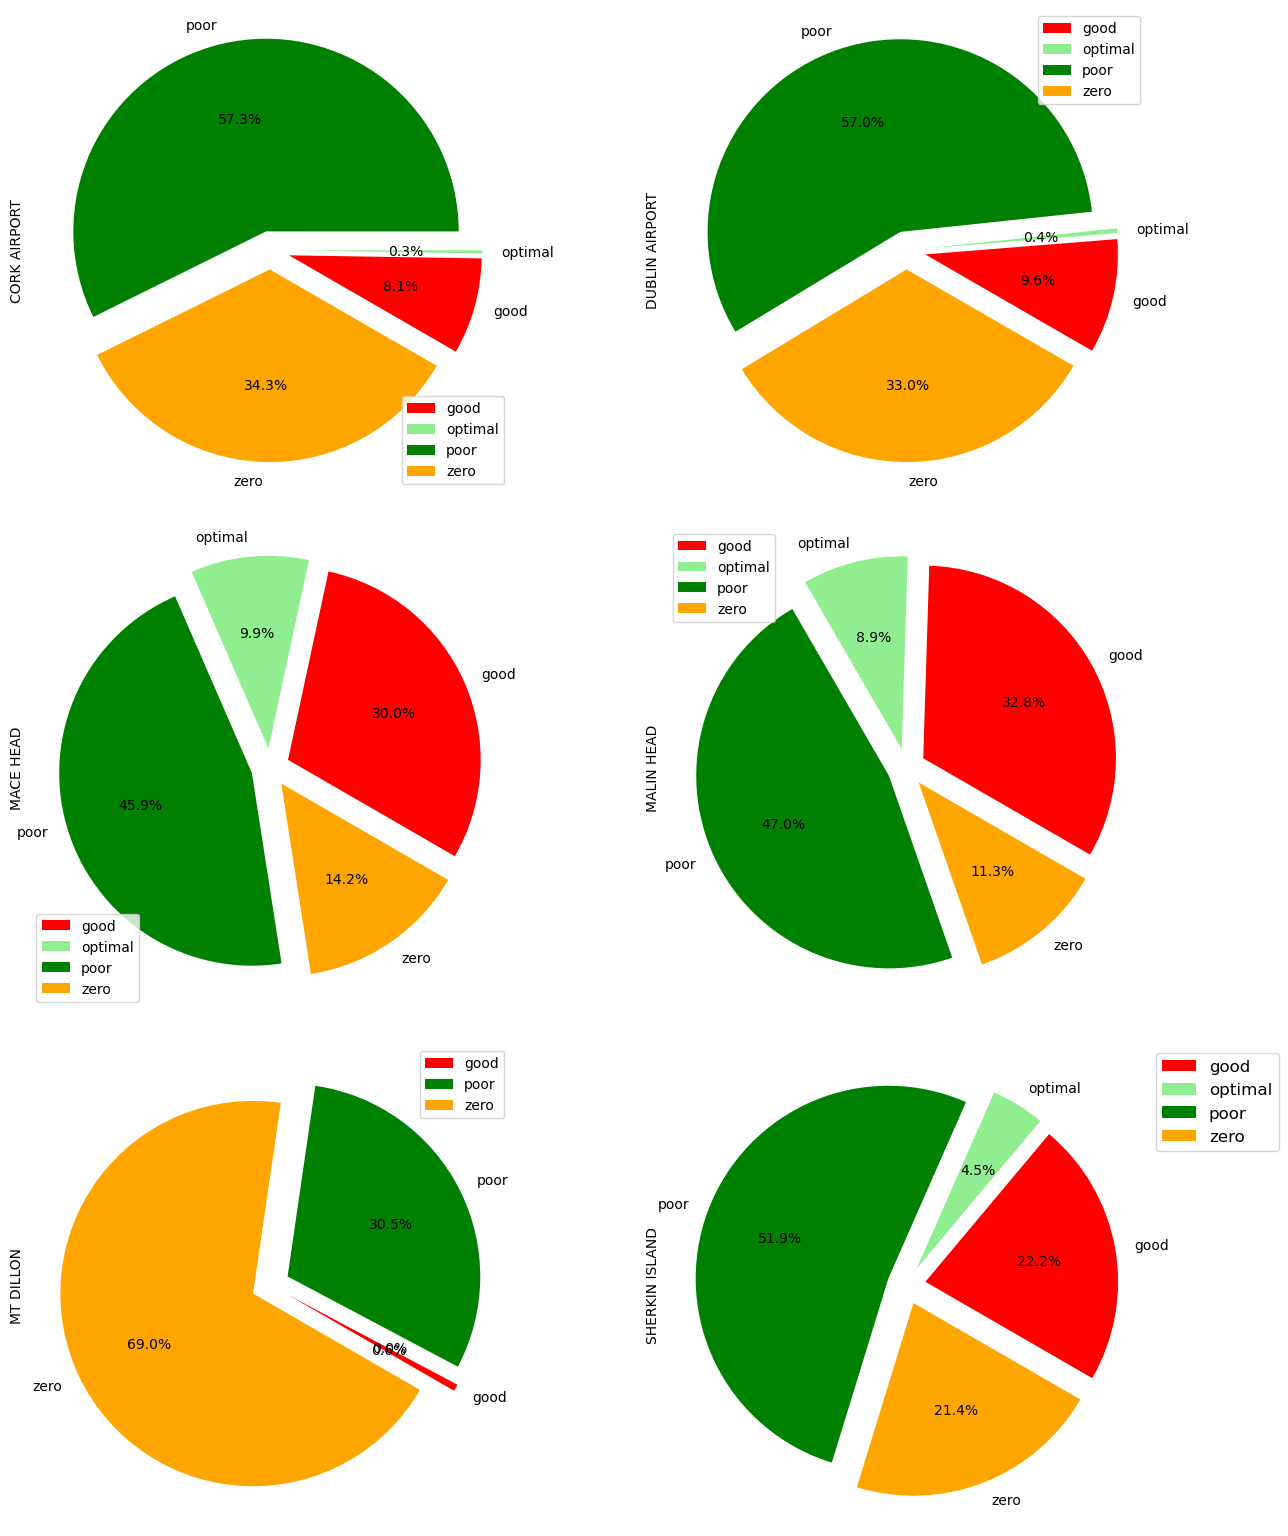

In [31]:
#Plot a pie chart of the rating counts for each station by station
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(14, 16))

#Set the colours for the pie chart
colours = ['red', 'lightgreen', 'green', 'orange', 'red']
rating = ['low','poor','good','optimal', 'high']
colormap = {rating[0]:colours[0], rating[1]:colours[1], rating[2]:colours[2], rating[3]:colours[3], rating[4]:colours[4]}

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


rating_counts = windspeed.groupby(['Rating', 'Station Name'])['Station Name'].count()


exp = (0.1, 0.1, 0.1, 0.1)
rating_counts.unstack().plot(kind='pie', ax=ax, colors=[colormap[key] for key in rating], subplots=True, autopct='%1.1f%%', startangle=-30, legend='Distribution of Mean Wind Speed (m/s)', fontsize=10, explode=exp)

# Add a legend instead of the labels (positioned outside the pie chart)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels=rating_counts.index.levels[0], fontsize=12)
plt.subplots_adjust(right=0.7, top=0.9)



plt.tight_layout(pad=3.0)


Looking at the above we can see that the windspeed at each of these locations is mostly in the poor or low power generation range. I have to say that I was of the opinion that Ireland was particularly suited as a location to set up a wind farm, but these plots are not confirming this. Why is this? 

### How much energy would be produced on Average at each of the above locations

When we were researching wind turbines earlier, we came across the formula that allow us to calculate the amount of energy produced by a wind turbine. Lets put that formula to use here now and work out how much energy we could have produce at the above locations if there was a windfarm at these locations. We spoke about the `Siemens SWT-3.0-101 3MW` wind turbine which is used in the Galway wind farm. Lets take this as the wind turbine for our example below.

In [32]:
# Add a new column to our dataframe to store the calculated power in watts
windspeed['Power (kW)'] = 0

#Set this column to be a floating point number
windspeed['Power (kW)'] = windspeed['Power (kW)'].astype(float)

#Use the formula from earlier to calculate the power in watts
#Firstly we need to get the diameter of the rotor for the SWT-3.0-101 wind turbine
#The rotor diameter is 101 meters source (https://en.wind-turbine-models.com/turbines/66-siemens-swt-3.0-101)

Diameter = 101.0
Swept_Area = np.pi * (Diameter/2)**2 #The swept area of the rotor in square meters
Density = 1.225 #The density of air in kg/m^3
Cp = 0.45 #The power coefficient of the wind turbine
Maximum_Power = 3200 #The maximum power output of the wind turbine in kilowatts
Max_Wind_Speed = 59.5 #The maximum wind speed in m/s at which the wind turbine can operate without damage

#Calculate the power in watts for each row in the dataframe
count = 0
for row in windspeed.itertuples():
    if row[2] < 4:
        windspeed.at[count, 'Power (kW)'] = 0
    elif row[2] >= 4 and row[2] < 25:
        windspeed.at[count, 'Power (kW)'] =round((0.5 * Cp * Swept_Area * Density * row[2]**3)/1000, 2)
    else:
        windspeed.at[count, 'Power (kW)'] = 0
    count += 1

windspeed.head()



,Station Name,Mean Wind Speed (m/s),Month,Year,Rating,Power (kW)
0,MALIN HEAD,12.30,1,2012,optimal,4109.29
1,MALIN HEAD,12.04,1,2012,optimal,3854.17
2,MALIN HEAD,16.82,1,2012,optimal,10508.22
3,MALIN HEAD,16.51,1,2012,optimal,9937.85
4,MALIN HEAD,15.54,1,2012,optimal,8287.13


In [34]:
#Total power in kilowatts
total_power = windspeed['Power (kW)'].sum()  

#Convert kilowat to GW (Gigawatts)
total_power_gw = total_power / 10**6

#Print results
print(f"Total wind power over the period: {total_power_gw:.2f} GW")

Total wind power over the period: 23.09 GW


In [35]:
#Mean power in kilowatts
mean_power = windspeed['Power (kW)'].mean()  

# Convert Watts to MW (Megawatts)
mean_power_mw = mean_power / 10**3

# Print results
print(f"Mean wind power per hour: {mean_power_mw:.2f} MW")

Mean wind power per hour: 0.82 MW


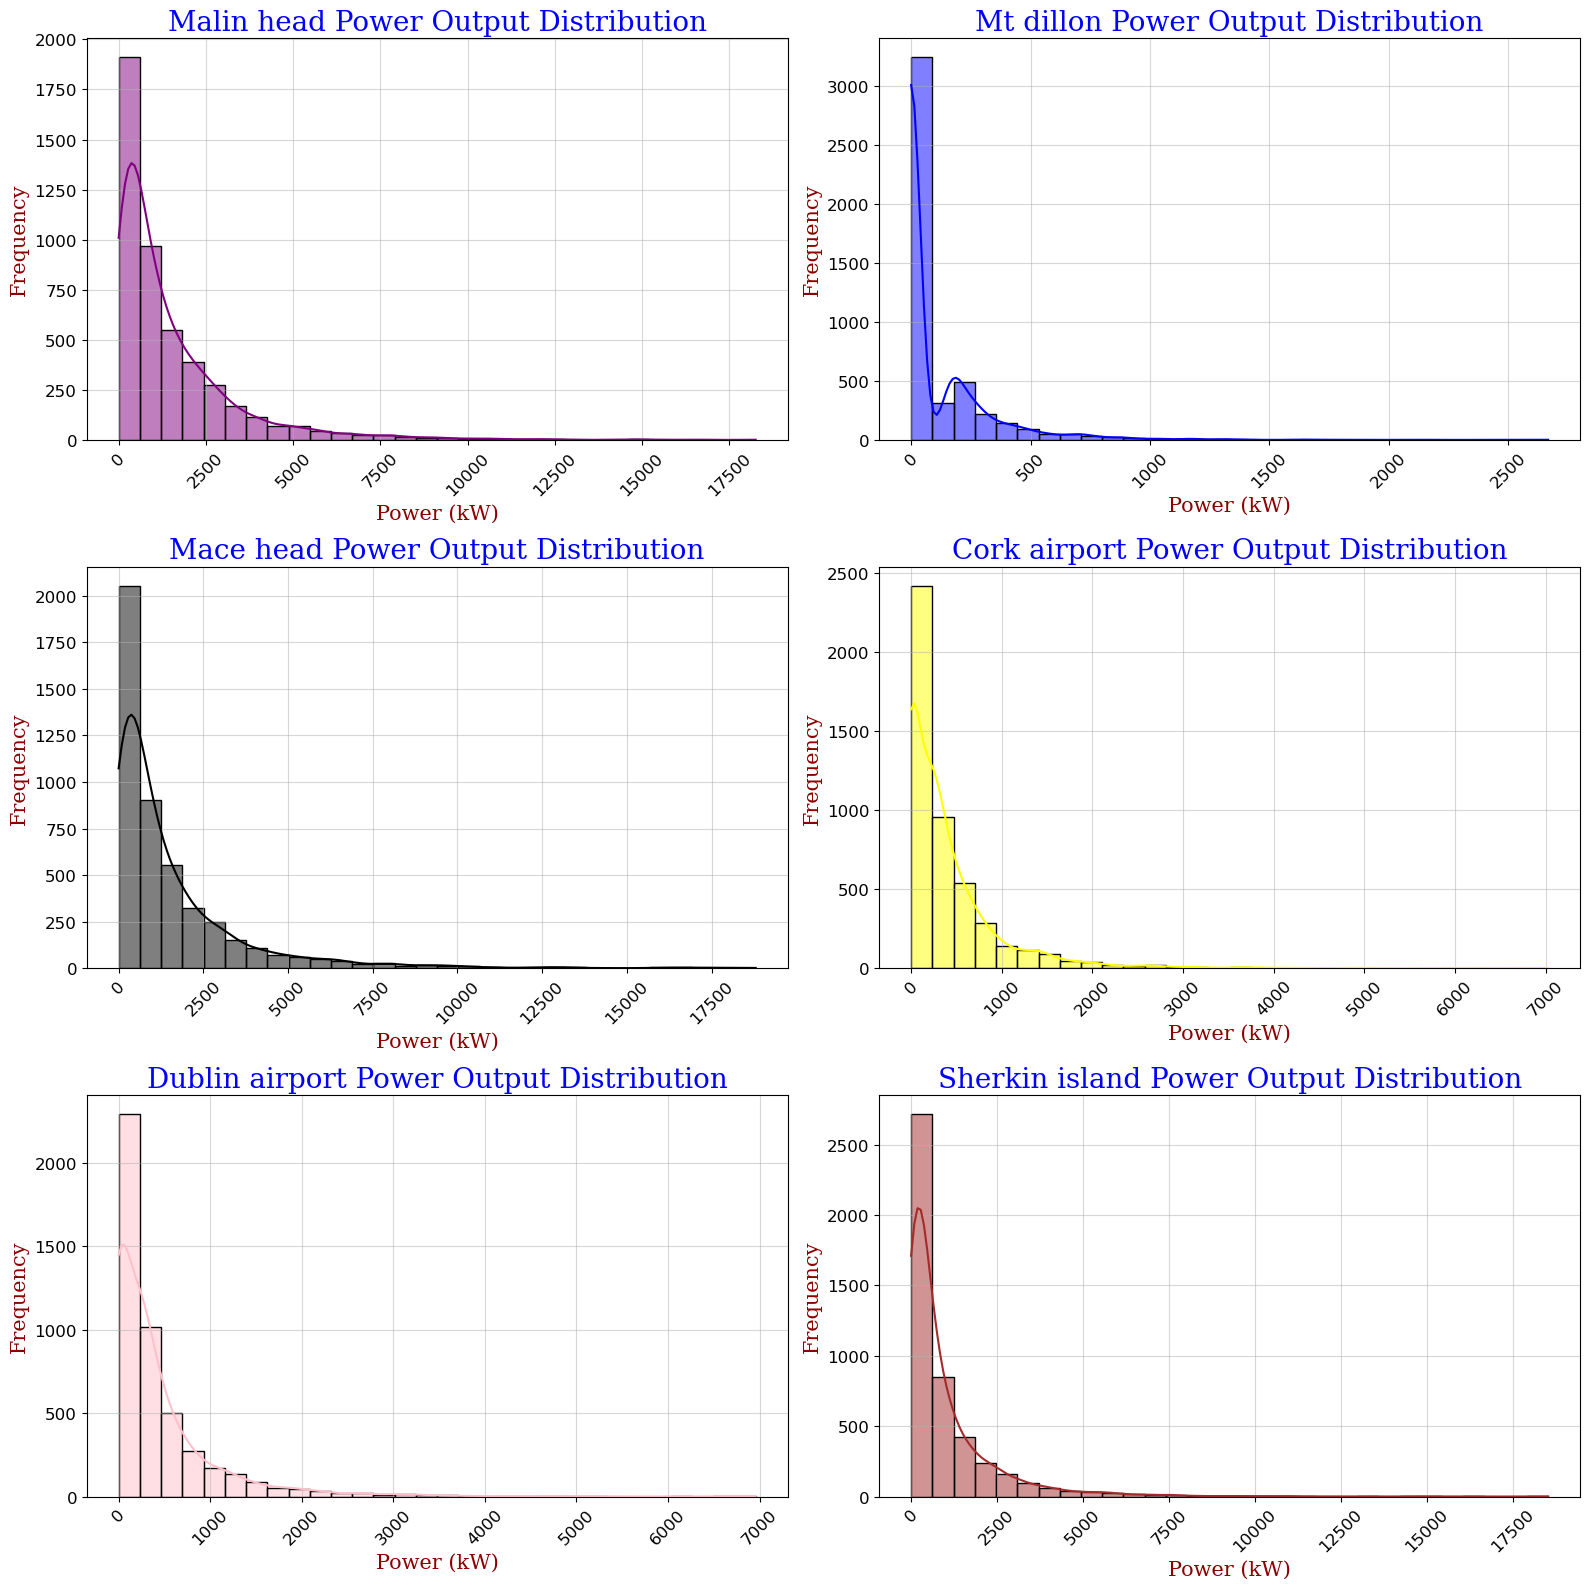

In [36]:
#Plot the power output for each station

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

i = 1
for station in windspeed['Station Name'].unique():
    plt.subplot(3, 2, i)
    sns.histplot(windspeed[windspeed['Station Name'] == station]['Power (kW)'],  bins=30, kde=True, color=plot_colours[i-1])

    #Set the title and labels for the plot
    plt.title(f'{station.capitalize()} Power Output Distribution', fontdict=font1)
    plt.xlabel('Power (kW)', fontdict=font2)
    plt.ylabel('Frequency', fontdict=font2)

    #Add a grid
    plt.grid(True, alpha=0.5, which='both')

    #Add ticks
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)

    plt.tight_layout()


    i += 1

### Best time of day for generating Power

Okay, so change tack and switch to one of the hourly datasets to check what time would be the best on average to generate power. 

** ADD CODE TO A CLASS TO REUSE ABOVE AND HERE, AND STOP CLUTTER **

In [37]:
# Add a new column to our dataframe to store the calculated power in watts

malin_head = hourly_datasets['malin_head'].copy()

malin_head['Power (kW)'] = 0

#Set this column to be a floating point number
malin_head['Power (kW)'] = malin_head['Power (kW)'].astype(float)

#Use the formula from earlier to calculate the power in watts
#Firstly we need to get the diameter of the rotor for the SWT-3.0-101 wind turbine
#The rotor diameter is 101 meters source (https://en.wind-turbine-models.com/turbines/66-siemens-swt-3.0-101)

Diameter = 101.0
Swept_Area = np.pi * (Diameter/2)**2 #The swept area of the rotor in square meters
Density = 1.225 #The density of air in kg/m^3
Cp = 0.45 #The power coefficient of the wind turbine
Maximum_Power = 3200 #The maximum power output of the wind turbine in kilowatts
Max_Wind_Speed = 59.5 #The maximum wind speed in m/s at which the wind turbine can operate without damage

#Calculate the power in watts for each row in the dataframe
count = 0
for row in malin_head.itertuples():
    if row[4] < 4:
        malin_head.at[count, 'Power (kW)'] = 0
    elif row[4] >= 4 and row[4] < 25:
        malin_head.at[count, 'Power (kW)'] =round((0.5 * Cp * Swept_Area * Density * row[4]**3)/1000, 2)
    else:
        malin_head.at[count, 'Power (kW)'] = 0
    count += 1

malin_head.head()


,Date/Time (utc),Precipitation Amount (mm),Temperature (°C),Mean Wind Speed (knot)_malin,Predominant Wind Direction (deg),Month,Year,Power (kW)
0,1955-05-01 01:00:00,0.0,8.5,11.0,130.0,5,1955,2939.20
1,1955-05-01 02:00:00,0.0,8.2,11.0,120.0,5,1955,2939.20
2,1955-05-01 03:00:00,0.0,7.3,8.0,120.0,5,1955,1130.63
3,1955-05-01 04:00:00,0.0,7.8,18.0,130.0,5,1955,12878.60
4,1955-05-01 05:00:00,0.0,8.1,9.0,110.0,5,1955,1609.83


In [38]:
#Extract hour, month from the 'Date/Time (utc)' column
malin_head['hour'] = malin_head['Date/Time (utc)'].dt.hour
malin_head['month'] = malin_head['Date/Time (utc)'].dt.month


In [39]:
#Calculate average wind power for each hour of the day
hourly_power = malin_head.groupby('hour')['Power (kW)'].mean()

# Convert to MW for better readability
hourly_power_mw = hourly_power/1000

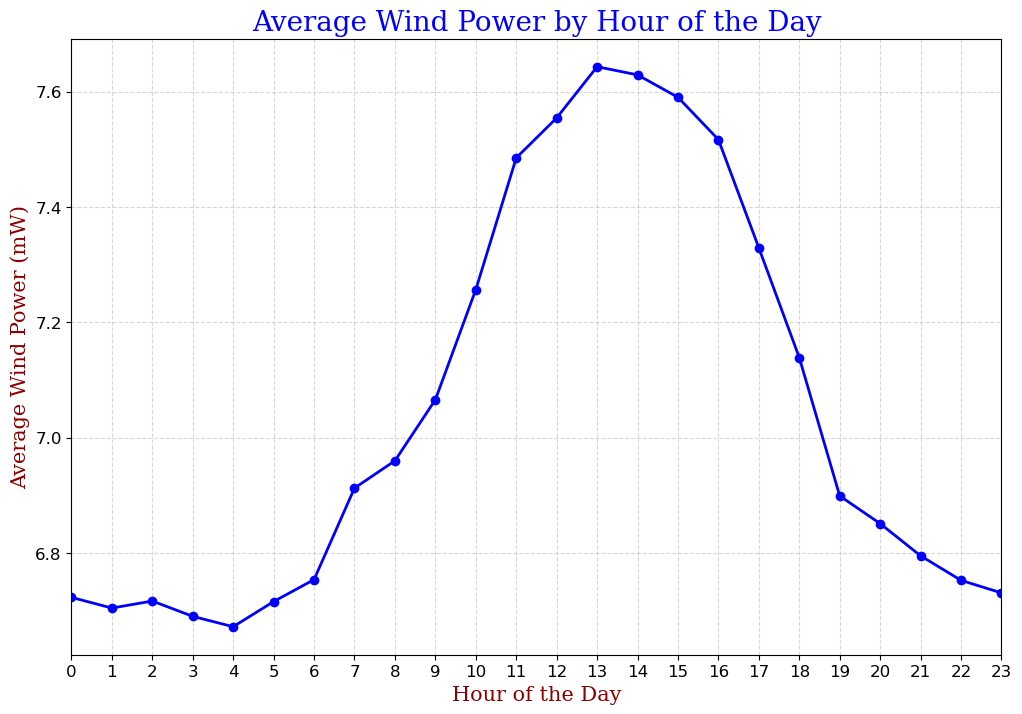

In [40]:
#Plot the average power output for each hour of the day
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Set the colours for the scatter plot and line plots
colours = ['skyblue', 'blue', 'black', 'yellow', 'pink', 'brown']


#Plot the average power output for each hour of the day
ax.plot(hourly_power_mw.index, hourly_power_mw, color='blue', linewidth=2, marker='o')  

#Set the title and labels for the plot
ax.set_title('Average Wind Power by Hour of the Day', fontdict=font1)
ax.set_xlabel('Hour of the Day', fontdict=font2)
ax.set_ylabel('Average Wind Power (mW)',   fontdict=font2)    

#Set the x-axis to be integers (hour)
ax.xaxis.set_major_locator(plt.MaxNLocator(26))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

#Add ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Add xlim
plt.xlim(0, 23)


# Add gridlines for y-axis
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


### Are windspeeds likely to be the same in 10 years?

In order to determine whether the windspeeds are likely to change over the next 10years we need to look at the historical trends, lets say a 20 year trend. We will use the hourly datasets to do this rather than the overall. The steps to do this are outlined below for the dublin hourly dataset. We will create a `best_fit` class which will complete these steps on the other hourly datasets for comparison.

In [41]:


bestfit = mace_head.copy()

#Use just the windspeed and Date/Time (utc) columns
bestfit = bestfit[['Date/Time (utc)', 'Mean Wind Speed (knot)_mace']]

#Convert the Mean Wind Speed (knot) column to m/s
bestfit['Mean Wind Speed (m/s)'] = round(bestfit['Mean Wind Speed (knot)_mace'] * 0.514444, 2)

#Resample for monthly wind speed data while keeping the mean and the index as the date
bestfit = bestfit.resample('ME', on='Date/Time (utc)').mean()

#Select the data from 2012 onwards
bestfit_2012 = (bestfit[bestfit.index.year >= 2012]).copy()

#Convert the Date/Time (utc) column to a number for analysis
bestfit_2012['DateNumber'] = mdates.date2num(bestfit_2012.index)

#Calculate the best fit parameters for the wind speed data m,c 
idx = np.isfinite(bestfit_2012['DateNumber']) & np.isfinite(bestfit_2012['Mean Wind Speed (m/s)'])	
 
m, c = np.polyfit(bestfit_2012['DateNumber'][idx], bestfit_2012['Mean Wind Speed (m/s)'][idx], 1)

print(f'The best fit parameters are m = {m} and c = {c}')


The best fit parameters are m = -4.189775716814843e-05 and c = 8.30148826332352


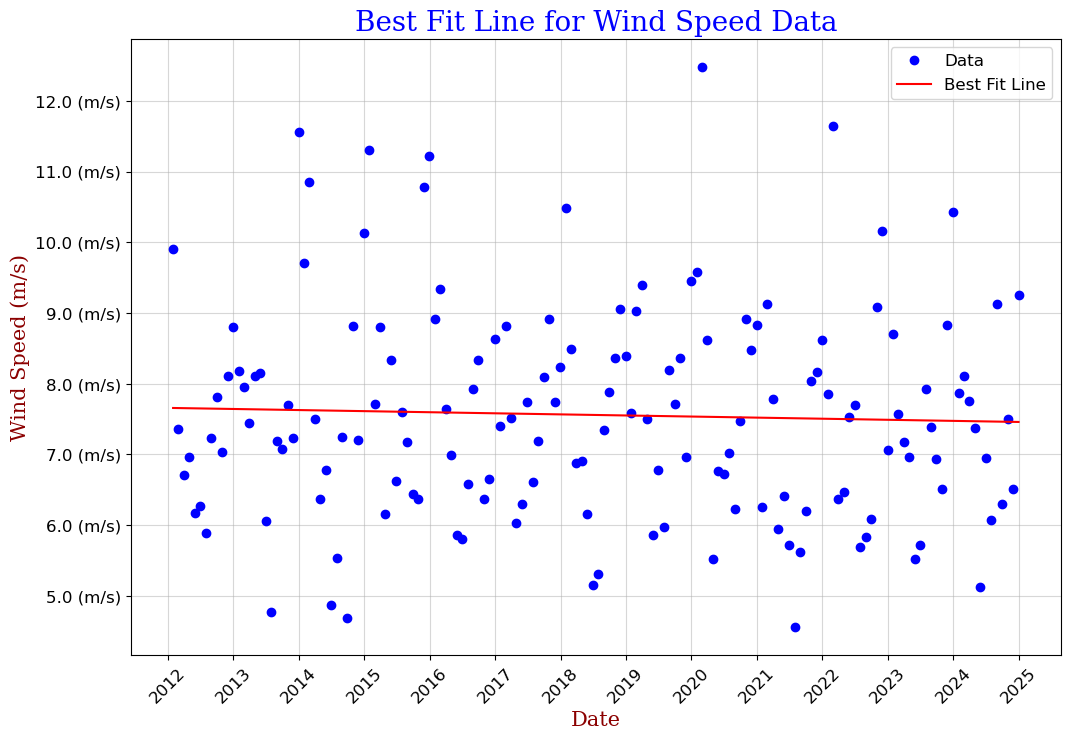

In [42]:

#Plot the best fit line
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

def windspeed_formatter(windspeed, pos):
    s = f"{windspeed} (m/s)"
    return s

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the data
ax.plot(bestfit_2012['Mean Wind Speed (m/s)'], 'o', label='Data', color='blue')

#Plot the best fit line
ax.plot(m*bestfit_2012['DateNumber'] + c, 'r-', label='Best Fit Line')

#Set the title and labels for the plot
ax.set_title('Best Fit Line for Wind Speed Data', fontdict=font1)

ax.set_xlabel('Date', fontdict=font2)
ax.set_ylabel('Wind Speed (m/s)', fontdict=font2)

#Add a legend
ax.legend(loc='upper right', fontsize=12)

#Set the major locator to every 2nd day, minor locator to every day.
ax.xaxis.set_major_locator(mdates.YearLocator())  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
ax.yaxis.set_major_formatter(plt.FuncFormatter(windspeed_formatter))

#Add ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

#Add a grid
plt.grid(True, which='both', alpha=0.5)

plt.show()

In [44]:

#Create an instance of the best fit class
bestfit = bf(sherkin_island)
name ='sherkin'          

#Get the best fit line for the wind speed data
bestfit.best_fit(name)

#Create an instance of the best fit class
bestfit = bf(mace_head)
name ='mace'

#Get the best fit line for the wind speed data
bestfit.best_fit(name)

#Create an instance of the best fit class
bestfit = bf(cork_airport) 
name ='cork'

#Get the best fit line for the wind speed data
bestfit.best_fit(name)

#Create an instance of the best fit class
bestfit = bf(dublin_airport)
name ='dublin'

#Get the best fit line for the wind speed data
bestfit.best_fit(name)

#Create an instance of the best fit class
bestfit = bf(mt_dillon)
name ='mt'

#Get the best fit line for the wind speed data
bestfit.best_fit(name)

 

Mean Wind Speed (knot)_sherkin
Mean Wind Speed (knot)_mace
Mean Wind Speed (knot)_cork
Mean Wind Speed (knot)_dublin
Mean Wind Speed (knot)_mt



<img src = "images/best_fit_line_athenry.png" alt ="Athenry" width ="400" heigth="400"> <img src = "images/best_fit_line_cork.png" alt ="Cork" width ="400" heigth="400">  

<img src = "images/best_fit_line_dublin.png" alt ="Dublin" width ="400" heigth="400"> <img src = "images/best_fit_line_gurteen.png" alt ="Gurteen" width ="400" heigth="400">  


<img src = "images/best_fit_line_mullingar.png" alt ="Mullingar" width ="400" heigth="400"> <img src = "images/best_fit_line_shannon.png" alt ="Shannon" width ="400" heigth="400">  


### End 

***